In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure

import os
from math import * 
os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
print("Moving up to the parent directory")
print(os.getcwd())

The current directory is: 
/home/springnuance/Desktop/Crystal-Plasticity-COE-Course/optimizers
Moving up to the parent directory
/home/springnuance/Desktop/Crystal-Plasticity-COE-Course


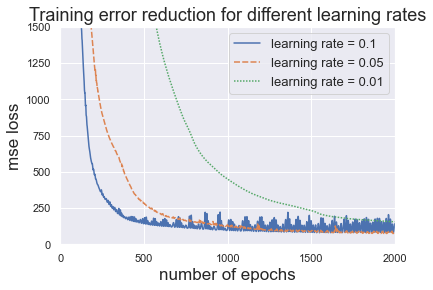

In [2]:
sns.set_theme(style="darkgrid")
# data = {'Name': ['Tom', 'nick', 'krish', 'jack'],
#         'Age': [20, 21, 19, 18]}
# df = pd.DataFrame(data)


training_errors = np.load(f"optimizers/losses/stage1/linear_uniaxial_RD_training_errors.npy", allow_pickle=True).tolist()
validation_errors = np.load(f"optimizers/losses/stage1/linear_uniaxial_RD_validation_errors.npy", allow_pickle=True).tolist()
numberOfHiddenLayers = 2 # Choose either 1 or 2
hiddenNodesFormula = "formula1" # Choose either 1 or 2
L2_regularization = 0.5
df = pd.DataFrame()
ANNOptimizer = "Adam"
for learning_rate in [0.1, 0.05, 0.01]:
    training_error = training_errors[f"numHid_{numberOfHiddenLayers}|{hiddenNodesFormula}|lr_{learning_rate}|L2_{L2_regularization}"]
    #if learning_rate != 0.01:
    df[f"learning rate = {learning_rate}"] = training_error
sns.lineplot(data=df)
size = 15
plt.title(f"Training error reduction for different learning rates",  size=size+3)
plt.rc('xtick', labelsize=size -1)    
plt.rc('ytick', labelsize=size -1)  
plt.ylabel('mse loss', size=size + 2)
plt.xlabel("number of epochs", size=size + 2)
plt.legend(loc=1, fontsize=size-2, ncol=1)
plt.xlim([0, 2000])
plt.ylim([0, 1500])
plt.show()


[]

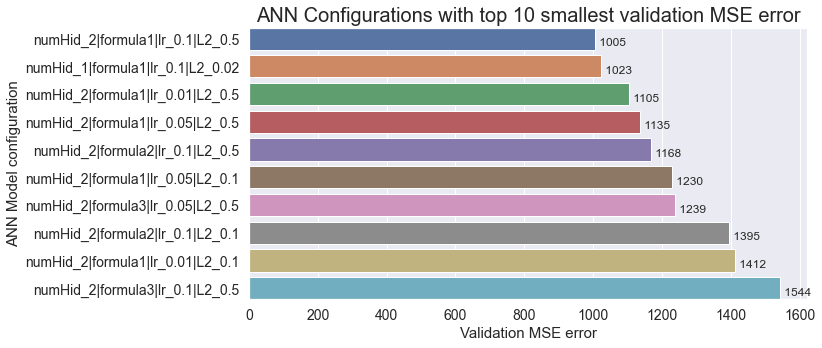

In [5]:
import matplotlib.pyplot as plt

validation_errors = np.load(f"optimizers/losses/stage1/linear_uniaxial_RD_validation_errors.npy", allow_pickle=True).tolist()

for param in validation_errors:
    validation_errors[param] = round(validation_errors[param])
length = len(list(validation_errors.items()))
part1 = list(sorted(list(validation_errors.items()), key = lambda modelError: modelError[1]))[0:10]
#dicti=({'37':99943,'25':47228,'36':16933,'40':14996,'35':11791,'34':8030,'24' : 6319 ,'2'  :5055 ,'39' :4758 ,'38' :4611  })
fontsize=15
pd_df = pd.DataFrame(part1)
pd_df.columns =["Model","Value"]
bars = pd_df["Value"]
plt.figure(figsize=(10,5))
sns.barplot(x="Value", y= "Model",data=pd_df)

plt.xlabel("Validation MSE error", fontsize=15) 
plt.ylabel('ANN Model configuration', fontsize=15)
plt.title("ANN Configurations with top 10 smallest validation MSE error", fontsize=20)
plt.margins(y=0)
for i, v in enumerate(list(pd_df["Value"].items())):   
   plt.text(v[1] + 3, v[0] + .25, f" {str(v[1])}")
plt.plot()

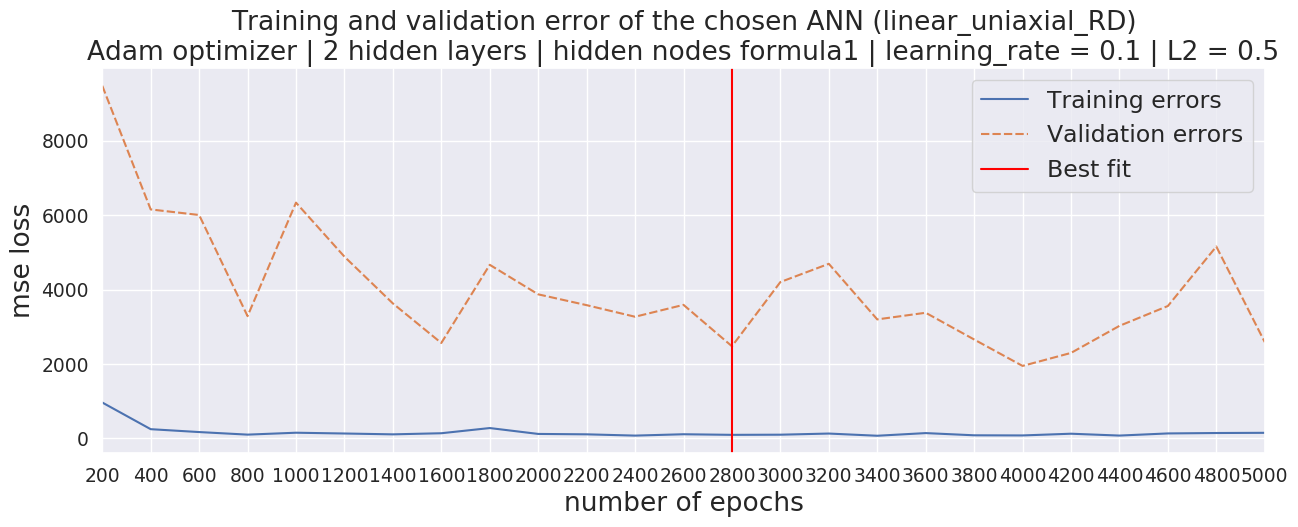

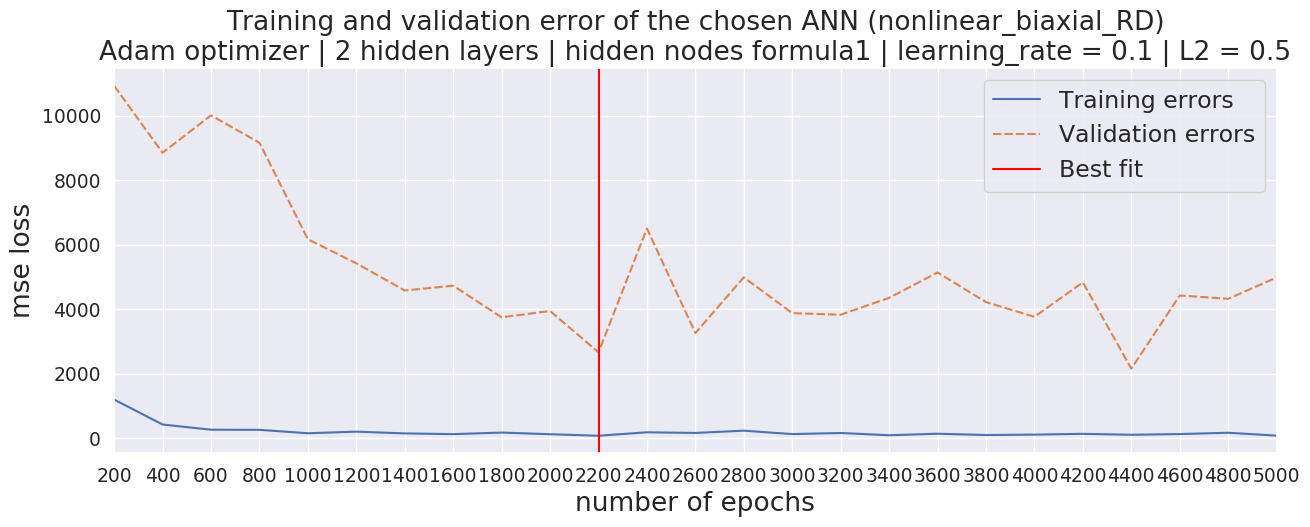

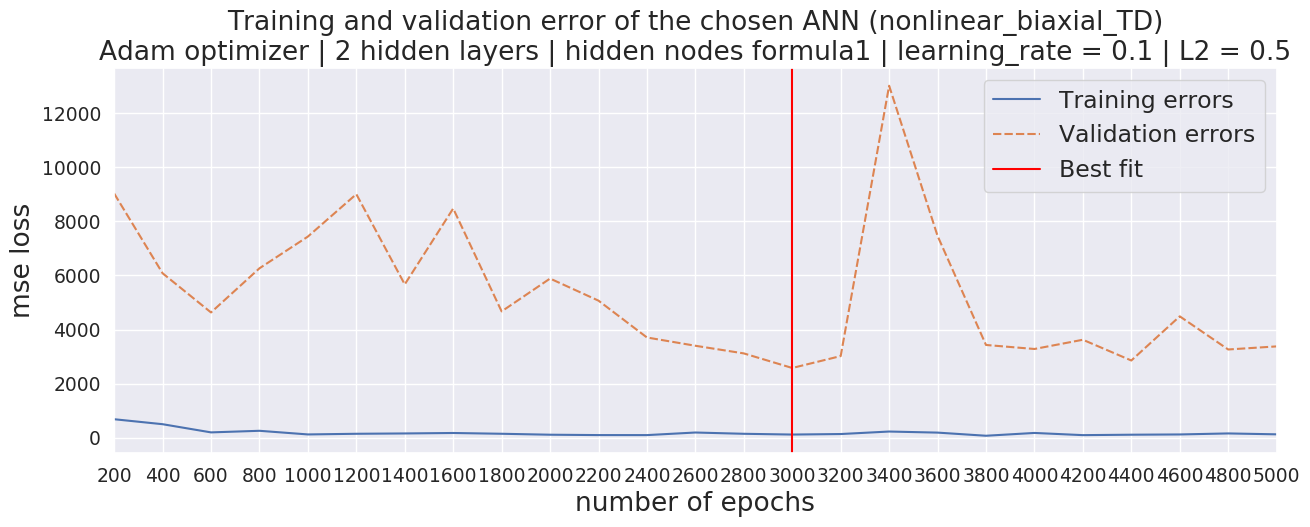

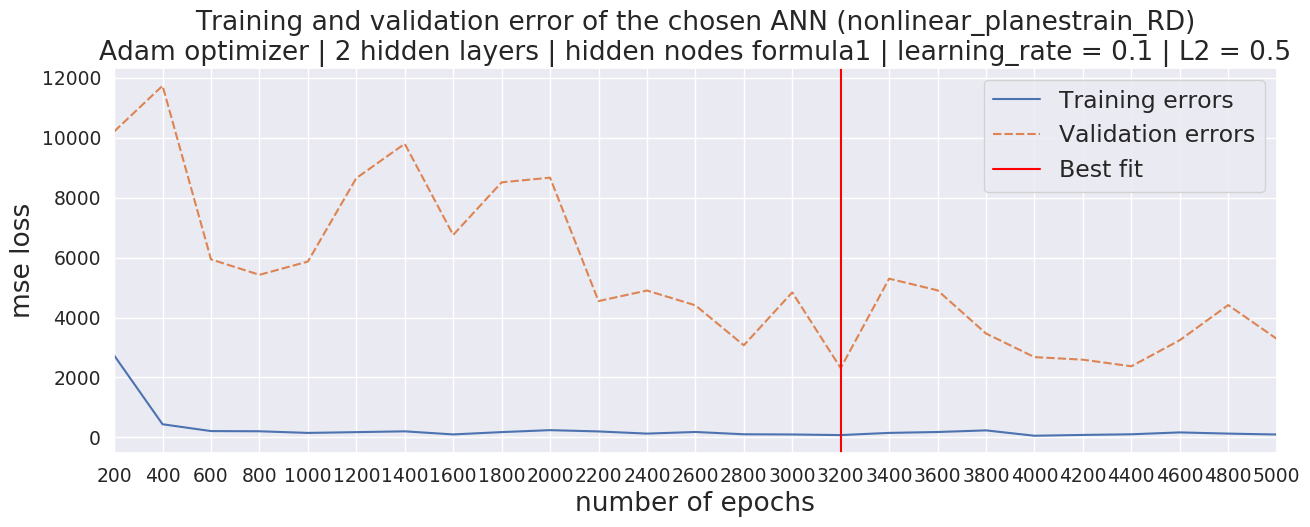

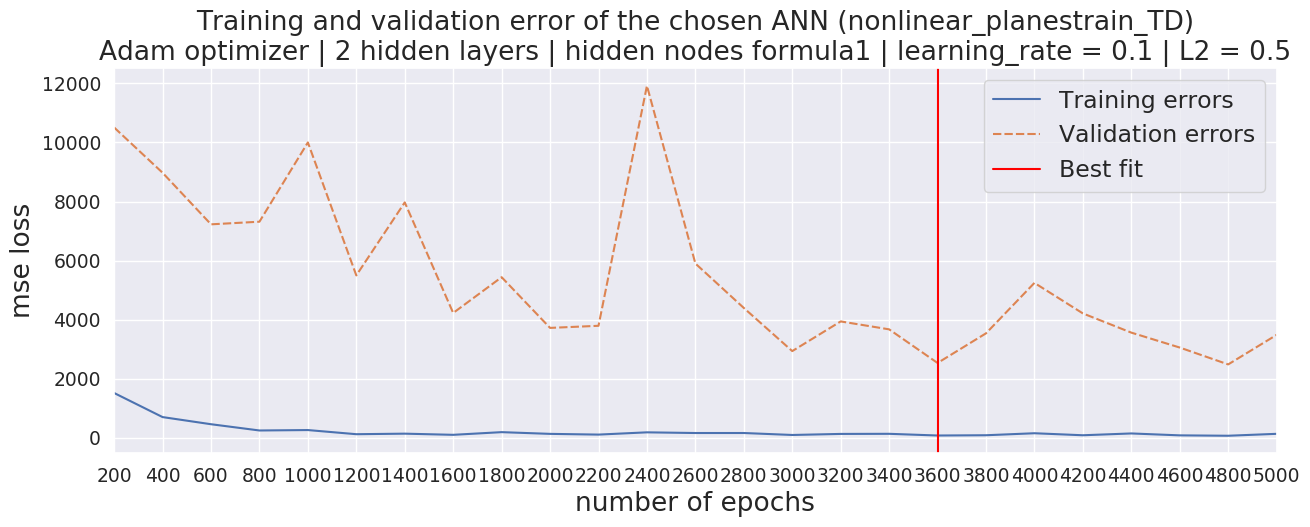

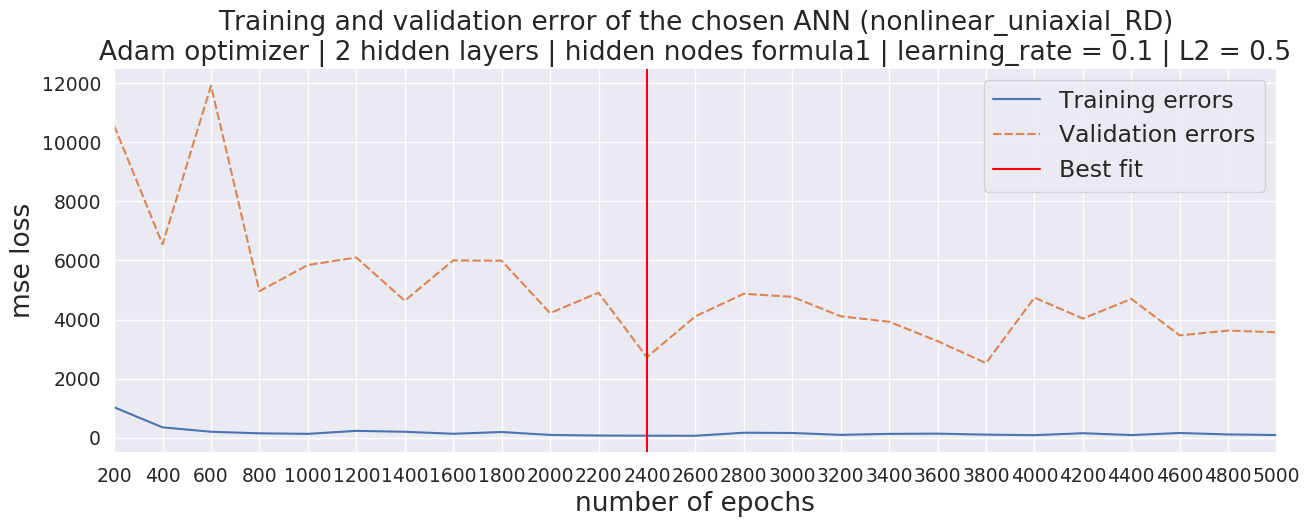

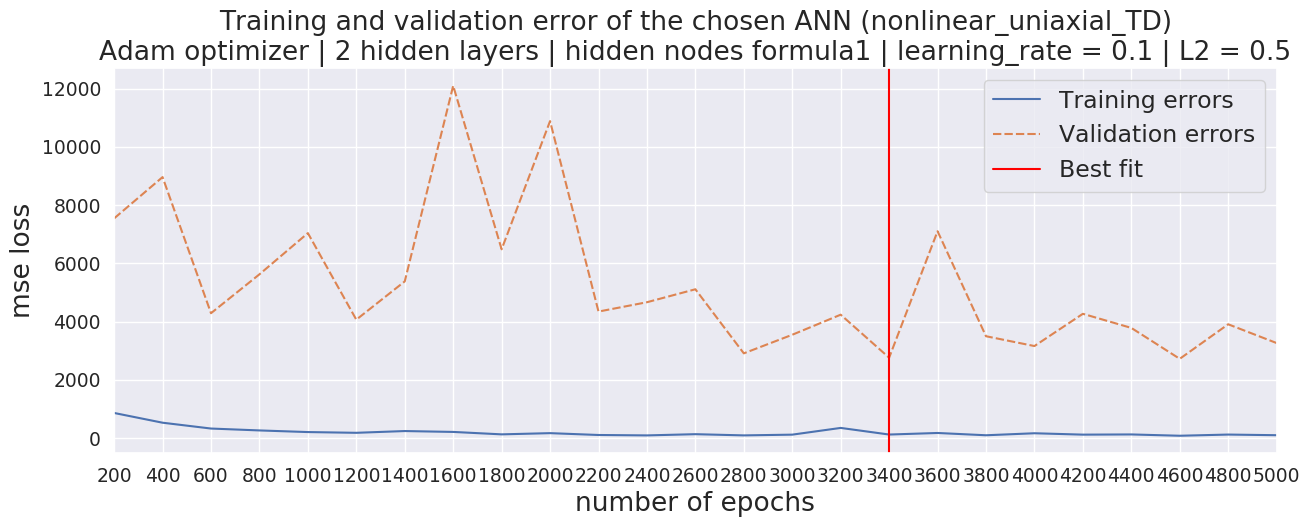

In [8]:
sns.set_theme(style="darkgrid")

hiddenNodesFormula = "formula1"
numberOfHiddenLayers = 2
ANNOptimizer = "Adam"
learning_rate = 0.1
L2_regularization = 0.5

# The 7 types of loadings: 1 linear loading and 6 nonlinear loadings
loadings = ["linear_uniaxial_RD", 
            "nonlinear_biaxial_RD", 
            "nonlinear_biaxial_TD",     
            "nonlinear_planestrain_RD",     
            "nonlinear_planestrain_TD",     
            "nonlinear_uniaxial_RD", 
            "nonlinear_uniaxial_TD"
            ]

best_fit = {
    "PH": {
        "linear_uniaxial_RD": 10, 
        "nonlinear_biaxial_RD": 15, 
        "nonlinear_biaxial_TD": 10,     
        "nonlinear_planestrain_RD": 17,     
        "nonlinear_planestrain_TD": 14,     
        "nonlinear_uniaxial_RD": 16, 
        "nonlinear_uniaxial_TD": 10
    },
    "DB": {
        "linear_uniaxial_RD": 13, 
        "nonlinear_biaxial_RD": 10, 
        "nonlinear_biaxial_TD": 14,     
        "nonlinear_planestrain_RD": 15,     
        "nonlinear_planestrain_TD": 17,     
        "nonlinear_uniaxial_RD": 11, 
        "nonlinear_uniaxial_TD": 16
    },
}

# Change the CPLaw
CPLaw = "DB"

for loading in loadings:
    plt.figure(figsize=(15,5))
    #print(epochs)
    training_errors_dict = np.load(f"optimizers/losses/stage2/{ANNOptimizer}_{hiddenNodesFormula}_hiddenLayers{numberOfHiddenLayers}_L2{L2_regularization}_lr{learning_rate}/{CPLaw}/{loading}_epochs_trainingErrors.npy", allow_pickle=True).tolist()
    validation_errors_dict = np.load(f"optimizers/losses/stage2/{ANNOptimizer}_{hiddenNodesFormula}_hiddenLayers{numberOfHiddenLayers}_L2{L2_regularization}_lr{learning_rate}/{CPLaw}/{loading}_epochs_validationErrors.npy", allow_pickle=True).tolist()
    epochs = list(training_errors_dict.keys())
    training_errors = list(training_errors_dict.values())
    validation_errors = list(validation_errors_dict.values())
    df = pd.DataFrame()
    df['Epochs'] = epochs
    df["Training errors"] = training_errors
    df["Validation errors"] = validation_errors
    df.set_index('Epochs', inplace=True)

    size = 15
    sns.lineplot(data=df)
    if CPLaw == "PH" and loading == "linear_uniaxial_RD":
        plt.annotate('underfit \nhigh bias\nlow variance', xy=(4, 400), xytext=(6, 410), fontsize=size +2,
                    arrowprops=dict(facecolor='black', shrink=0.05))

        plt.annotate('overfitting prevented\n(L2 regularization)', xy=(18, 470), xytext=(11, 400), fontsize=size+2,
                    arrowprops=dict(facecolor='black', shrink=0.05))

    plt.axvline(best_fit[CPLaw][loading], label="Best fit",color="red")

    plt.title(f"Training and validation error of the chosen ANN ({loading})\n{ANNOptimizer} optimizer | {numberOfHiddenLayers} hidden layers | hidden nodes {hiddenNodesFormula} | learning_rate = {learning_rate} | L2 = {L2_regularization}",  size=size + 4)
    #plt.rc('xtick', labelsize=size + 0, fontsize)    
    plt.xticks(fontsize=size-1.5)
    plt.yticks(fontsize=size-1.5)
    #plt.rc('ytick', labelsize=size)  

    plt.xlim([0,24])
    plt.ylabel('mse loss', size=size + 4)
    plt.xlabel("number of epochs", size=size + 4)
    plt.legend(loc=1, fontsize=size + 2, ncol=1)
    plt.show()

In [115]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
import matplotlib.ticker as mticker  
import imageio

sns.set_theme(style="darkgrid")

hiddenNodesFormula = "formula1"
numberOfHiddenLayers = 2
ANNOptimizer = "Adam"
learning_rate = 0.1
L2_regularization = 0.5


plt.figure(figsize=(15,5))
#print(epochs)
training_errors_dict = np.load(f"optimizers/losses/stage2/{ANNOptimizer}_{hiddenNodesFormula}_hiddenLayers{numberOfHiddenLayers}_L2{L2_regularization}_lr{learning_rate}/epochs_trainingErrors.npy", allow_pickle=True).tolist()
validation_errors_dict = np.load(f"optimizers/losses/stage2/{ANNOptimizer}_{hiddenNodesFormula}_hiddenLayers{numberOfHiddenLayers}_L2{L2_regularization}_lr{learning_rate}/epochs_validationErrors.npy", allow_pickle=True).tolist()
epochs = list(training_errors_dict.keys())
training_errors = list(training_errors_dict.values())
validation_errors = list(validation_errors_dict.values())
df = pd.DataFrame()
df['Epochs'] = epochs
df["Training errors"] = training_errors
df["Validation errors"] = validation_errors
df.set_index('Epochs', inplace=True)


for i in range(2, 26):
    fig = plt.figure(figsize=(18,7))
    sns.lineplot(data=df.head(i))
    plt.ylim([0, 1500])
    plt.xlim([0, 25]) # Number of rows in df
    size = 15
    plt.title(f"Training and validation error of the chosen ANN\n{ANNOptimizer} optimizer | hidden nodes {hiddenNodesFormula} | {numberOfHiddenLayers} hidden layers | L2 = {L2_regularization} | learning_rate = {learning_rate}",  size=size + 5)
    plt.rc('xtick', labelsize=size -1)    
    plt.rc('ytick', labelsize=size -1)  
    plt.ylabel('mse loss', size=size + 4)
    plt.xlabel("number of epochs", size=size + 4)
    
    if i == 25:
        plt.annotate('underfit \nhigh bias\nlow variance', xy=(4, 400), xytext=(7, 410), fontsize=size + 3,
            arrowprops=dict(facecolor='black', shrink=0.05))

        plt.annotate('overfitting prevented\n(L2 regularization)', xy=(18, 450), xytext=(11, 400), fontsize=size + 3,
                    arrowprops=dict(facecolor='black', shrink=0.05,))

        plt.axvline(10, label="Best fit",color="red")
    plt.legend(loc=1, fontsize=size, ncol=1)
    plt.savefig(f"optimizers/train_and_validation_errors/line-{i}.png")
    plt.close()
    #return graph

with imageio.get_writer('optimizers/animations/train_and_validation_errors.gif', mode='i', duration=0.3, loop = 1) as writer:
    for i in range(2, 26):
        image = imageio.imread(f'optimizers/train_and_validation_errors/line-{i}.png')
        writer.append_data(image)


#plt.show()

/tmp/ipykernel_30383/2327039932.py:57: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'optimizers/train_and_validation_errors/line-{i}.png')


<Figure size 1500x500 with 0 Axes>